In [1]:
from keras.models import load_model
from generator import captcha_generator as gen
import string
from tqdm import tqdm
import numpy as np
from matplotlib import pyplot as plt
import cv2

Using TensorFlow backend.


In [2]:
chars = string.ascii_lowercase + string.ascii_uppercase
width, height, n_len, n_class = 130, 53, 4, len(chars)

In [3]:
model = load_model('weixin_trained_model.h5')

/home/ubuntu/anaconda2/lib/python2.7/site-packages/keras/models.py:248: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


In [4]:
def decode(y):
    y = np.argmax(np.array(y), axis=2)[:,0]
    return ''.join([chars[x] for x in y])

In [5]:
def evaluate(model, batch_num=20):
    batch_acc = 0
    generator = gen(width=width, height=height)
    for i in tqdm(range(batch_num)):
        X, y = generator.next()
        y_pred = model.predict(X)
        batch_acc += np.mean(map(np.array_equal, np.argmax(y, axis=2).T, np.argmax(y_pred, axis=2).T))
    return batch_acc / batch_num

In [6]:
print evaluate(model)

100%|██████████| 20/20 [00:08<00:00,  2.52it/s]

0.1078125


In [6]:
generator = gen(width=width, height=height, batch_size=1)

In [7]:
X, y = generator.next()

In [8]:
X.shape
decode(y)

'jNUE'

In [109]:
def yevaluate(model, cnt=1000):
    batch_acc = 0
    generator = gen(width=width, height=height, batch_size=1)
    for _ in tqdm(range(cnt)):
        X, y = generator.next()
        y_pred = model.predict(X)
        if decode(y).lower() == decode(y_pred).lower():
            batch_acc += 1
    return float(batch_acc) / cnt

In [112]:
print yevaluate(model, 10000)

100%|██████████| 10000/10000 [01:45<00:00, 94.96it/s]

0.9946


# 生成函数测试

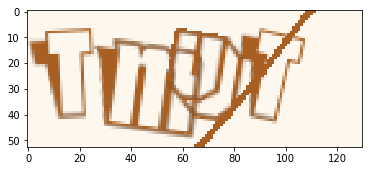

y: tMVt
pred_y: TmvT


In [6]:
a = gen(width=width, height=height, batch_size=1)
X, y = a.next()
pred_y = model.predict(X)
plt.imshow(cv2.cvtColor(X[0], cv2.COLOR_BGR2RGB))
plt.show()
print 'y:', decode(y)
print 'pred_y:', decode(pred_y)

In [17]:
X[:, 12:18, 3:10]

array([[[[ 84, 131, 185],
         [ 75, 124, 183],
         [ 66, 118, 180],
         [ 56, 110, 176],
         [ 38,  98, 170],
         [177, 202, 229],
         [237, 247, 254]],

        [[ 34,  95, 169],
         [ 34,  95, 169],
         [ 34,  95, 169],
         [ 34,  95, 169],
         [ 34,  95, 169],
         [165, 194, 224],
         [237, 247, 254]],

        [[ 34,  95, 169],
         [ 34,  95, 169],
         [ 34,  95, 169],
         [ 34,  95, 169],
         [ 34,  95, 169],
         [155, 186, 219],
         [237, 247, 254]],

        [[ 34,  95, 169],
         [ 34,  95, 169],
         [ 34,  95, 169],
         [ 34,  95, 169],
         [ 34,  95, 169],
         [145, 178, 215],
         [237, 247, 254]],

        [[ 34,  95, 169],
         [ 34,  95, 169],
         [ 34,  95, 169],
         [ 34,  95, 169],
         [ 34,  95, 169],
         [134, 170, 210],
         [232, 244, 252]],

        [[ 34,  95, 169],
         [ 34,  95, 169],
         [ 34,  95, 169],
  

# 实测

In [22]:
test_path = os.getcwd() + '/sample'
root, dirs, files = os.walk(test_path).next()

def getAllImages(path):
    cnt = len(files)
    X = np.zeros((cnt, height, width, 3), dtype=np.uint8)
    y = []
    for i, j in enumerate(files):
        #X[i] = cv2.imread(root+'/'+j)
        img = cv2.imread(root+'/'+j)
        b, g, r = cv2.split(img)
        X[i] = cv2.merge([r, g, b])
        y.append(j[:4])
    return X, y

allX, ally = getAllImages(test_path)

In [23]:
pred_y = model.predict(allX[2].reshape(X.shape))

In [24]:
decode(pred_y)

'nwHV'

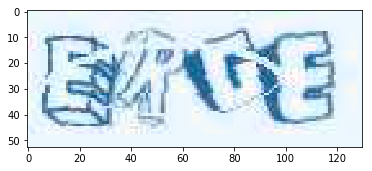

In [25]:
plt.imshow(cv2.cvtColor(allX[6], cv2.COLOR_BGR2RGB))
plt.show()

In [26]:
allX[6][32:48, 6:8]

array([[[142, 120,  83],
        [156, 132,  94]],

       [[136, 114,  77],
        [143, 119,  81]],

       [[134, 110,  74],
        [139, 113,  76]],

       [[139, 115,  79],
        [157, 129,  92]],

       [[149, 125,  91],
        [180, 152, 115]],

       [[153, 129,  95],
        [185, 157, 120]],

       [[149, 124,  93],
        [167, 138, 104]],

       [[142, 118,  90],
        [143, 117,  84]],

       [[242, 221, 194],
        [213, 188, 158]],

       [[255, 244, 220],
        [245, 224, 197]],

       [[255, 252, 232],
        [255, 249, 227]],

       [[255, 246, 230],
        [255, 247, 231]],

       [[248, 238, 226],
        [255, 243, 229]],

       [[253, 244, 235],
        [255, 249, 240]],

       [[254, 247, 239],
        [255, 254, 248]],

       [[247, 243, 234],
        [253, 250, 243]]], dtype=uint8)

In [91]:
al = ally[0]
al.lower()

'febe'

In [27]:
count = len(ally)
correct = 0
for i, j in zip(allX, ally):
    predy = model.predict(i.reshape(X.shape))
    predy = decode(predy)
    if predy.lower() == j.lower():
        correct += 1
print 'the total correct number is %d' %correct
print 'the right rate is %.2f%%' %(float(correct)/count*100)

the total correct number is 183
the right rate is 18.75%


In [18]:
b, g, r = cv2.split(allX[6])

In [19]:
rgb_img = cv2.merge([r, g, b])

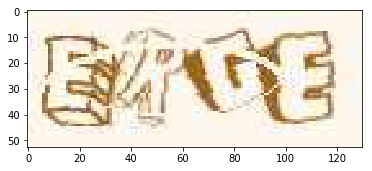

In [21]:
plt.imshow(rgb_img)
plt.show()